# Inicio

Librerías

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
from tqdm import tqdm

# Funciones

Valores de cartillas de bingo

In [2]:
# Letras del bingo y máximo valor de cada letra:
bingo_dict = {
    'B': 15,
    'I': 30,
    'N': 45,
    'G': 60,
    'O': 75
}

# Crear fila conteniendo valores aleatorios de
# una cartilla de bingo:
def create_cart(bingo_dict: dict):

    row = []
    for max_val in bingo_dict.values():
        min_val = max_val - 14
        vals = np.random.permutation(np.arange(min_val, max_val+1))[:5]
        row.extend(list(vals))

    return row

# Crear el DF que contiene n cartillas de bingo
# usando la función anterior para cada cartilla:
def create_data(n_rows: int):

    # Encabezados de data de cartillas:
    headers = []
    for letter in bingo_dict.keys():
        headers.extend([letter+'_'+str(idx) for idx in range(1,6)])

    # Creación de DF:
    ceros = np.zeros((n_rows,25))
    df = pd.DataFrame(ceros, columns=headers)
    for row_idx in range(n_rows):
        df.loc[row_idx,:] = create_cart(bingo_dict)

    return df

Simulación de bingo

In [3]:
# Buscar si hay un ganador en la data, según una
# lista de resultados. Si hay uno, retorna su
# índice en el df, sino, retorna -1:
def search_winner(data: pd.DataFrame, res_list: list):

    df_temp = data[data.isin(res_list)]
    res = df_temp.dropna(how='any', axis=0)
    if len(res) == 0:
        return []
    elif len(res) == 1:
        return [res.index.values[0]]
    elif len(res) > 1:
        return [idx for idx in res.index.values]

# Jugar un bingo:
def bingo(data: pd.DataFrame):

    # Generar resultados aleatorios de un bingo:
    res = np.random.permutation(np.arange(1,76))

    # Simular el bingo:
    res_list = []
    for idx, val in enumerate(res):

        # Sacar una bola:
        res_list.append(val)

        # No hacer nada hasta llegar a la bola #25:
        if idx < 25:
            continue

        # Verificar si hay un ganador y terminar:
        winner_s = search_winner(data, res_list)
        if len(winner_s) == 0:
            continue
        else:
            return idx, winner_s

# Simulación

Objetivo:
- Ver la relación entre el número de cartillas y el número de bolas necesarias para encontrar ganador.

### Ejemplo individual

Cartillas

In [4]:
data = create_data(5)

In [5]:
data

,B_1,B_2,B_3,B_4,B_5,I_1,I_2,I_3,I_4,I_5,...,G_1,G_2,G_3,G_4,G_5,O_1,O_2,O_3,O_4,O_5
0,11.0,5.0,4.0,12.0,15.0,22.0,24.0,26.0,30.0,16.0,...,54.0,58.0,52.0,57.0,50.0,64.0,72.0,70.0,73.0,67.0
1,15.0,9.0,7.0,3.0,1.0,17.0,20.0,21.0,19.0,23.0,...,56.0,48.0,55.0,52.0,49.0,71.0,63.0,68.0,70.0,66.0
2,6.0,3.0,12.0,10.0,8.0,27.0,28.0,21.0,23.0,17.0,...,54.0,49.0,57.0,58.0,47.0,72.0,64.0,63.0,70.0,62.0
3,12.0,4.0,7.0,1.0,9.0,24.0,17.0,27.0,20.0,29.0,...,60.0,59.0,58.0,54.0,48.0,70.0,61.0,73.0,62.0,66.0
4,13.0,1.0,7.0,5.0,14.0,22.0,25.0,28.0,23.0,26.0,...,55.0,48.0,51.0,54.0,59.0,61.0,64.0,62.0,66.0,73.0


Juego individual de 100 cartillas

In [7]:
data = create_data(100)
data.shape

(100, 25)

In [8]:
nball, winner_idx = bingo(data)
print('Número de cartillas:', len(data))
print('El juego terminó en la bola', nball)
print('Cartilla(s) ganadora(s):', winner_idx)

Número de cartillas: 100
El juego terminó en la bola 65
Cartilla(s) ganadora(s): [62, 69]


### Simulación

10-2000 cartillas con saltos de 10. 300 juegos por cartilla.

In [8]:
n_players_opts = np.arange(10, 2010, 10)
n_games = 300
matrix = []

for n_players in tqdm(n_players_opts):

    data = create_data(n_players)

    for game in range(n_games):
        nball, winner_idx = bingo(data)
        if len(winner_idx) > 1:
            n_winners = len(winner_idx)
        else:
            n_winners = 1
        matrix.append([n_players, nball, n_winners])

100%|██████████| 200/200 [14:13:37<00:00, 256.09s/it]  


In [9]:
df_res = pd.DataFrame(matrix, columns=['Players', 'Rounds', 'Winners'])
df_res.shape

(60000, 3)

In [10]:
df_res.to_csv('Test_10-2000_300.csv', index=False)

1-50 cartillas con saltos de 1. 300 juegos por cartilla.

In [8]:
n_players_opts = np.arange(1, 51, 1)
n_games = 300
matrix = []

for n_players in tqdm(n_players_opts):

    data = create_data(n_players)

    for game in range(n_games):
        nball, winner_idx = bingo(data)
        if len(winner_idx) > 1:
            n_winners = len(winner_idx)
        else:
            n_winners = 1
        matrix.append([n_players, nball, n_winners])

100%|██████████| 50/50 [16:16<00:00, 19.52s/it]


In [9]:
df_res = pd.DataFrame(matrix, columns=['Players', 'Rounds', 'Winners'])
df_res.shape

(15000, 3)

In [10]:
df_res.to_csv('Test_1-50_300.csv', index=False)

# Resultados

### Consolidado

In [17]:
df_1 = pd.read_csv('Test_1-50_300.csv')
df_2 = pd.read_csv('Test_10-2000_300.csv')

In [18]:
df_res = pd.concat([df_1, df_2.query('Players > 50')], axis=0)
df_res

,Players,Rounds,Winners
0,1,74,1
1,1,68,1
2,1,72,1
3,1,74,1
4,1,73,1
...,...,...,...
59995,2000,58,2
59996,2000,59,1
59997,2000,59,2
59998,2000,60,3


# Filtro de Outliers

Filtrado de valores con una diferencia de la media de 3 desviaciones estandar

In [48]:
# Valores únicos de número de cartillas:
carts = df_res['Players'].unique()

# Contenedor de df filtrado:
df_filt = pd.DataFrame(columns=['Players', 'Rounds', 'Winners'])

# Contenedor de métricas de filtro:
df_metrics = pd.DataFrame(columns=['Players',
                                   'Initial_Kurt', 'Final_Kurt',
                                   'Initial_Skew', 'Final_Skew',
                                   'Kurt_Dif', 'Skew_Dif']).set_index('Players')

for n_cart in carts:

    # Consulta:
    df_temp = df_res.query('Players==@n_cart').copy()
    idxs = df_temp.index

    # Variable a filtrar:
    rounds = df_temp['Rounds'].values

    # Medidas iniciales:
    k_i = round(kurtosis(rounds), 2)
    s_i = round(skew(rounds), 2)

    # Filtrado de outliers:
    avg = np.mean(rounds)
    desvest = np.std(rounds)
    up_lim = avg + 3*desvest
    lo_lim = avg - 3*desvest
    def toFilt(row):
        val = row['Rounds']
        if val <= up_lim and val >= lo_lim:
            return False
        else:
            return True
    df_temp['ToFilt'] = df_temp.apply(toFilt, axis=1)
    df_temp_f = df_temp.query('ToFilt == False')

    # Variable filtrada:
    rounds_2 = df_temp_f['Rounds'].values

    # Medidas finales:
    k_f = round(kurtosis(rounds_2), 2)
    s_f = round(skew(rounds_2), 2)
    k_dif = abs(k_i) - abs(k_f)
    s_dif = abs(s_i) - abs(s_f)

    # Almacenamiento de resultados:
    df_filt = pd.concat([df_filt, df_temp_f.drop('ToFilt', axis=1)], axis=0)
    df_metrics.loc[n_cart,:] = [k_i, k_f, s_i, s_f, k_dif, s_dif]

df_metrics = df_metrics.astype('float')
print(df_res.shape)
print(df_filt.shape)

(73500, 3)
(72781, 3)


Visualización de resultados

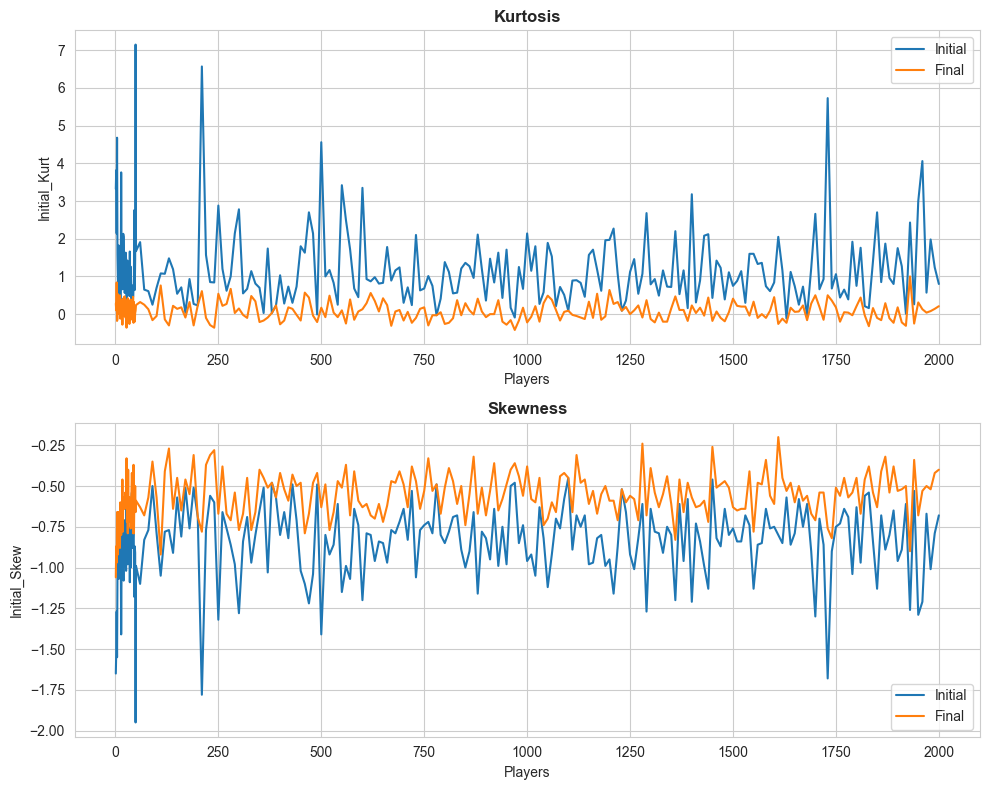

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

sb.lineplot(df_metrics['Initial_Kurt'], ax=axes[0], label='Initial')
sb.lineplot(df_metrics['Final_Kurt'], ax=axes[0], label='Final')
axes[0].set_title('Kurtosis', fontweight='bold')

sb.lineplot(df_metrics['Initial_Skew'], ax=axes[1], label='Initial')
sb.lineplot(df_metrics['Final_Skew'], ax=axes[1], label='Final')
axes[1].set_title('Skewness', fontweight='bold')

fig.tight_layout()
plt.legend()
plt.show()

In [50]:
df_metrics.describe()

,Initial_Kurt,Final_Kurt,Initial_Skew,Final_Skew,Kurt_Dif,Skew_Dif
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,1.193265,0.084980,-0.853714,-0.565347,0.984694,0.288367
std,1.025206,0.250917,0.236781,0.140463,1.000987,0.187323
min,-0.120000,-0.420000,-1.950000,-1.060000,-0.330000,0.000000
25%,0.580000,-0.110000,-0.970000,-0.660000,0.390000,0.150000
50%,0.930000,0.070000,-0.820000,-0.570000,0.710000,0.250000
75%,1.570000,0.250000,-0.690000,-0.470000,1.330000,0.380000
max,7.150000,1.000000,-0.450000,-0.200000,7.060000,1.290000


### Resultados principales

Copia de seguridad

In [55]:
df = df_filt.astype('int').copy()

Distribución

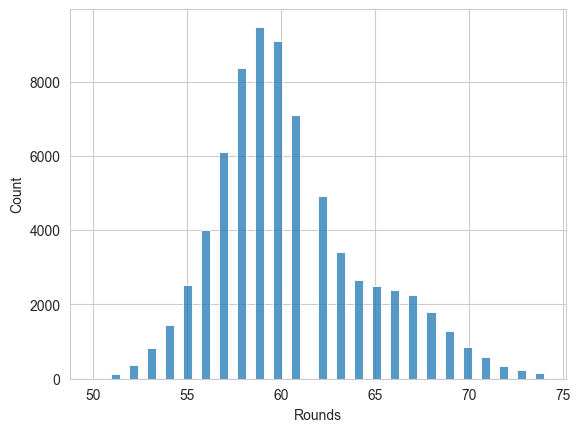

In [68]:
sb.histplot(data=df, x='Rounds', bins=50)
plt.show()

Relación entre las variables

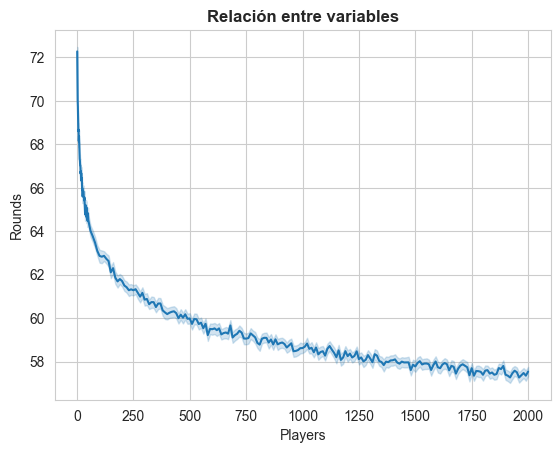

In [69]:
sb.lineplot(data=df, x='Players', y='Rounds')
plt.title('Relación entre variables', fontweight='bold')
plt.show()

Nota:
- PARECE haber una buena relación exponencial o logaritmica entre ambas variables.

Exportar

In [72]:
df.to_csv('Data filtrada.csv', index=False)